In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load handwritten digits dataset from keras
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
len(X_train)

60000

In [4]:
# we are having 60000 images in X_train each with size 28*28
X_train[0].shape

(28, 28)

In [7]:
X_train.shape
# 60000 images of 28*28

(60000, 28, 28)

In [6]:
X_train[0]
# As image is 28*28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
X_train=X_train/255
X_test=X_test/255
# scaling values between 0 to 1

In [18]:
# In case of image input layer size is equal to the no of pixels present in the image,so in 28*28 =784 pixels
# hence 784 neurons in the first layer
# it is necessary to reshape X_train into (784,1) 
# X_train.shape = 60000,28,28
# X_train_flattened.shape =  60000,84
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [19]:
X_test_flattened.shape

(10000, 784)

In [20]:
X_train_flattened[0]
# 1d array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
# Sequential = stack of layers in neural network,since it is stack it will access every layer(mentioned in Keras.Sequential) 
# as element 
model = keras.Sequential([
#     Dense means every neuron in layer is connected to every other neuron in next layer,In this case we have 784 neurons in 
#     input layer and 10 neurons(each neuron represent nos from 0 to 9) in output layer
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)
# epochs indicate no of times training to be performed

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4738 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3044 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9261


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2666 - accuracy: 0.9247


[0.26657015085220337, 0.9247000217437744]

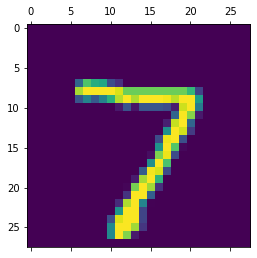

In [24]:
plt.matshow(X_test[0])

In [26]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]
# this is returning output layer i.e prob of output equal to no between 0 to 9. 1.68e-02 is prob that pred value is 0
# Index of max value in the array will be the output 

array([1.6818136e-02, 2.7826439e-07, 4.7880322e-02, 9.7554576e-01,
       2.5117397e-03, 1.5456349e-01, 1.1732990e-06, 9.9967289e-01,
       9.0122193e-02, 6.5628582e-01], dtype=float32)

In [27]:
np.argmax(y_predicted[0])

7

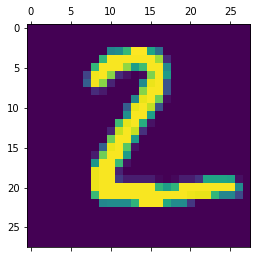

In [28]:
plt.matshow(X_test[1])

In [31]:
y_predicted[1]

array([3.0174857e-01, 3.6197603e-03, 9.9924833e-01, 3.3860072e-01,
       6.7736161e-10, 8.1364417e-01, 8.8925278e-01, 7.9913880e-13,
       1.6617441e-01, 4.4920667e-09], dtype=float32)

In [32]:
np.argmax(y_predicted[1])

2

In [35]:
# predict 1st 5 
# All the predictions are in y_predicted
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [36]:
y_test[0:5]
# predicted and actual results are same

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
# Model using hidden layer
# hiddden layer increses accuracy
model = keras.Sequential([
#     (hidden neurons,input neurons)
#     (output neurons)
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.2651 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1200 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0845 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0632 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0507 - accuracy: 0.9842


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9770


[0.07524248957633972, 0.9769999980926514]